In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
X_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(X_data))

In [5]:
y_true = 0.5*X_data + 5 + noise

In [6]:
X_df = pd.DataFrame(data=X_data, columns=["X data"])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [8]:
df = pd.concat([X_df, y_df], axis=1)

In [9]:
df.head()

,X data,Y
0,0.00000,6.278202
1,0.00001,4.888012
2,0.00002,4.939588
3,0.00003,5.151961
4,0.00004,4.307002


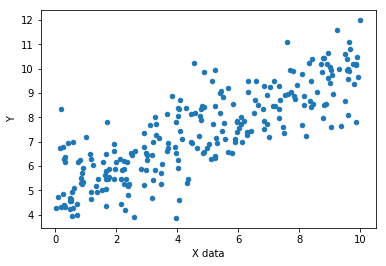

In [10]:
df.sample(n = 250).plot(kind= "scatter", x="X data", y= "Y")

In [11]:
batch_size = 16

In [12]:
np.random.randn(2)

array([ 1.29434621, -1.060728  ])

In [13]:
m = tf.Variable(1.4)
b = tf.Variable(0.24)

In [14]:
x_ph = tf.placeholder(tf.float32, [batch_size])

In [15]:
y_ph = tf.placeholder(tf.float32, [batch_size])

In [16]:
y_model = m*x_ph + b

In [17]:
error = tf.reduce_sum(tf.square(y_ph - y_model))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [19]:
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(X_data), size=batch_size)
        feed_dict = {x_ph: X_data[rand_ind], y_ph:y_true[rand_ind]}
        sess.run(train, feed_dict = feed_dict)
    model_m, model_b = sess.run([m, b])

In [22]:
print(model_m, model_b)

0.4741953 5.013559


In [23]:
y_hat = X_data*model_m + model_b

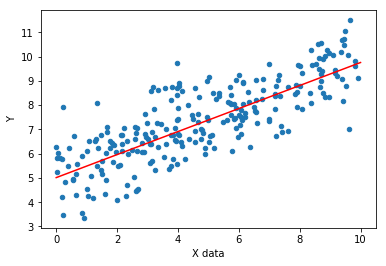

In [24]:
df.sample(250).plot(kind = "scatter", x="X data", y="Y")
plt.plot(X_data, y_hat, 'r')

## TF Estimator 

In [25]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [26]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmpzeda7y38', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_true, test_size = 0.3, random_state = 101)

In [29]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [30]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size=8, shuffle=False)

In [31]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [32]:
estimator.train(input_fn=input_func, steps= 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\jatin\AppData\Local\Temp\tmpzeda7y38\model.ckpt.
INFO:tensorflow:loss = 534.079, step = 1
INFO:tensorflow:global_step/sec: 1519.19
INFO:tensorflow:loss = 29.278717, step = 101 (0.067 sec)
INFO:tensorflow:global_step/sec: 1823
INFO:tensorflow:loss = 56.025692, step = 201 (0.055 sec)
INFO:tensorflow:global_step/sec: 1966.07
INFO:tensorflow:loss = 18.594461, step = 301 (0.051 sec)
INFO:tensorflow:global_step/sec: 1891.83
INFO:tensorflow:loss = 16.425411, step = 401 (0.053 sec)
INFO:tensorflow:global_step/sec: 1966.05
INFO:tensorflow:loss = 28.723042, step = 501 (0.051 sec)
INFO:tensorflow:global_step/sec: 1891.83
INFO:tensorflow:loss = 13.481388, step = 601 (0.053 sec)
INFO:tensorflow:global_step/sec: 1790.49
INFO:tensorflow:loss = 13.6743145, step = 701 (0.055 sec)
INFO:tensorflow:global_step/sec: 1823.03
INFO:tensorflow:loss = 14.562631, step = 801 (0.056 sec)
INFO:tensorflow:global_step/s

In [33]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-10-16-07:37:44
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpzeda7y38\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [34]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-10-16-07:37:46
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpzeda7y38\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [35]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.1016874, 'loss': 8.813499, 'global_step': 1000}


In [36]:
print('Test Data Metrics')
print(test_metrics)

Test Data Metrics
{'average_loss': 1.1128742, 'loss': 8.902993, 'global_step': 1000}


In [37]:
new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': new_data}, shuffle=False)

In [38]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpzeda7y38\model.ckpt-1000


[{'predictions': array([4.4232717], dtype=float32)},
 {'predictions': array([5.063925], dtype=float32)},
 {'predictions': array([5.7045774], dtype=float32)},
 {'predictions': array([6.3452306], dtype=float32)},
 {'predictions': array([6.9858837], dtype=float32)},
 {'predictions': array([7.6265364], dtype=float32)},
 {'predictions': array([8.267189], dtype=float32)},
 {'predictions': array([8.907843], dtype=float32)},
 {'predictions': array([9.548496], dtype=float32)},
 {'predictions': array([10.189148], dtype=float32)}]

In [39]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpzeda7y38\model.ckpt-1000


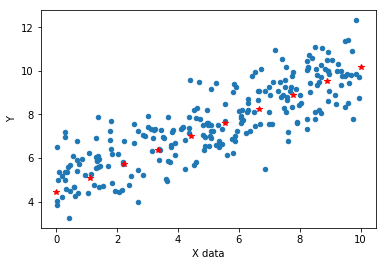

In [40]:
df.sample(n=250).plot(kind="scatter", x='X data', y= "Y")
plt.plot(new_data, predictions, 'r*')

### Tf Estimator LinearClassifier

In [41]:
import pandas as pd

In [42]:
diabetes = pd.read_csv('diabetes.csv')

In [43]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [46]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()) )

In [47]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [48]:
import tensorflow as tf

In [49]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
skin_thick = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedgree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

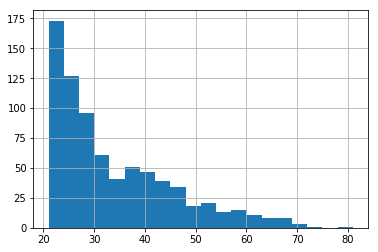

In [51]:
diabetes['Age'].hist(bins=20)

In [52]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [53]:
feat_cols = [num_preg, plasma_gluc, dias_press, skin_thick,insulin, bmi, pedgree, age_bucket]

In [54]:
X = diabetes.drop('Outcome', axis=1)

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [56]:
y = diabetes['Outcome']

In [57]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [60]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y= y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [61]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmpcahon_n3', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [63]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpcahon_n3\model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into C:\Users\jatin\AppData\Local\Temp\tmpcahon_n3\model.ckpt.
INFO:tensorflow:loss = 5.4544864, step = 2
INFO:tensorflow:global_step/sec: 647.028
INFO:tensorflow:loss = 5.451954, step = 102 (0.157 sec)
INFO:tensorflow:global_step/sec: 731.877
INFO:tensorflow:loss = 7.4714746, step = 202 (0.137 sec)
INFO:tensorflow:global_step/sec: 836.138
INFO:tensorflow:loss = 3.2809882, step = 302 (0.120 sec)
INFO:tensorflow:global_step/sec: 856.986
INFO:tensorflow:loss = 3.7994876, step = 402 (0.117 sec)
INFO:tensorflow:global_step/sec: 802.139
INFO:tensorflow:loss = 7.1326504, step = 502 (0.125 sec)
INFO:tensorflow:global_step/sec: 783.331
INFO:tensorflow:loss = 6.196747, step = 602 (0.129 sec)
INFO:tensorflow:global_step/sec: 672.943
INFO:tensorflow:loss = 7.9173894, step = 702 (0.149 sec)
INFO:tensorflow:global_s

In [64]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [66]:
model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-10-16-07:43:05
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpcahon_n3\model.ckpt-1001
INFO:tensorflow:Finished evaluation at 2018-10-16-07:43:05
INFO:tensorflow:Saving dict for global step 1001: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8012346, auc_precision_recall = 0.6544204, average_loss = 0.5253593, global_step = 1001, label/mean = 0.35064936, loss = 5.056583, prediction/mean = 0.37741202


{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8012346,
 'auc_precision_recall': 0.6544204,
 'average_loss': 0.5253593,
 'label/mean': 0.35064936,
 'loss': 5.056583,
 'prediction/mean': 0.37741202,
 'global_step': 1001}

In [67]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=10, num_epochs=1, shuffle=False)

In [68]:
predictions = model.predict(pred_input_func)

In [69]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpcahon_n3\model.ckpt-1001


In [70]:
my_pred

[{'logits': array([0.12748146], dtype=float32),
  'logistic': array([0.5318273], dtype=float32),
  'probabilities': array([0.46817273, 0.5318273 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([1.0194855], dtype=float32),
  'logistic': array([0.7348724], dtype=float32),
  'probabilities': array([0.26512766, 0.7348724 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.0279374], dtype=float32),
  'logistic': array([0.26348418], dtype=float32),
  'probabilities': array([0.7365158 , 0.26348418], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.4377661], dtype=float32),
  'logistic': array([0.19189152], dtype=float32),
  'probabilities': array([0.80810845, 0.19189152], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits':

In [71]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10 ,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmp6ihu1wdw', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [73]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmp6ihu1wdw\model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into C:\Users\jatin\AppData\Local\Temp\tmp6ihu1wdw\model.ckpt.
INFO:tensorflow:loss = 6.9221497, step = 2
INFO:tensorflow:global_step/sec: 748.26
INFO:tensorflow:loss = 5.33285, step = 102 (0.136 sec)
INFO:tensorflow:global_step/sec: 802.143
INFO:tensorflow:loss = 5.142438, step = 202 (0.124 sec)
INFO:tensorflow:global_step/sec: 815.18
INFO:tensorflow:loss = 7.5675845, step = 302 (0.124 sec)
INFO:tensorflow:global_step/sec: 828.653
INFO:tensorflow:loss = 4.8201814, step = 402 (0.122 sec)
INFO:tensorflow:global_step/sec: 803.146
INFO:tensorflow:loss = 7.294887, step = 502 (0.124 sec)
INFO:tensorflow:global_step/sec: 813.594
INFO:tensorflow:loss = 5.1162863, step = 602 (0.123 sec)
INFO:tensorflow:global_step/sec: 825.189
INFO:tensorflow:loss = 9.067551, step = 702 (0.121 sec)
INFO:tensorflow:global_step/s

In [74]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-10-16-07:47:11
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmp6ihu1wdw\model.ckpt-1001
INFO:tensorflow:Finished evaluation at 2018-10-16-07:47:11
INFO:tensorflow:Saving dict for global step 1001: accuracy = 0.77922076, accuracy_baseline = 0.64935064, auc = 0.8212345, auc_precision_recall = 0.6607294, average_loss = 0.49343747, global_step = 1001, label/mean = 0.35064936, loss = 4.749336, prediction/mean = 0.39169985


{'accuracy': 0.77922076,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8212345,
 'auc_precision_recall': 0.6607294,
 'average_loss': 0.49343747,
 'label/mean': 0.35064936,
 'loss': 4.749336,
 'prediction/mean': 0.39169985,
 'global_step': 1001}

## House Price prediction

In [119]:
from sklearn.datasets import load_boston

In [120]:
boston_data = load_boston()

In [121]:
X = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

In [122]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [123]:
y = pd.DataFrame(data=boston_data.target, columns=['target'])

In [124]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Scaling Data

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

In [127]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [128]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [129]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.000234,0.0,0.036562,0.0,0.150206,0.522066,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026
116,0.001377,0.0,0.331700,0.0,0.333333,0.470409,0.716787,0.145541,0.217391,0.467557,0.553191,0.990922,0.284492
45,0.001825,0.0,0.214851,0.0,0.129630,0.369941,0.318229,0.361084,0.086957,0.087786,0.563830,1.000000,0.233996
16,0.011744,0.0,0.261214,0.0,0.314815,0.421395,0.271885,0.306359,0.130435,0.229008,0.893617,0.974658,0.133830
468,0.174971,0.0,0.636638,0.0,0.401235,0.419565,0.701339,0.161755,1.000000,0.914122,0.808511,0.928993,0.452539


In [130]:
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [131]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.000930,0.000000,0.107049,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
274,0.000533,0.421053,0.196005,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
491,0.001087,0.000000,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
72,0.000928,0.000000,0.361855,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
452,0.057112,0.000000,0.636638,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808


#### Create Feature Columns

In [142]:
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [133]:
crim = tf.feature_column.numeric_column('CRIM')
zn = tf.feature_column.numeric_column('ZN')
indus = tf.feature_column.numeric_column('INDUS')
chas = tf.feature_column.numeric_column('CHAS')
nox = tf.feature_column.numeric_column('NOX')
rm = tf.feature_column.numeric_column('RM')
age = tf.feature_column.numeric_column('AGE')
dis = tf.feature_column.numeric_column('DIS')
rad = tf.feature_column.numeric_column('RAD')
tax = tf.feature_column.numeric_column('TAX')
ptratio = tf.feature_column.numeric_column('PTRATIO')
b = tf.feature_column.numeric_column('B')
lstat = tf.feature_column.numeric_column('LSTAT')

In [134]:
feat_cols = [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]

In [135]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train, y= y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [136]:
model = tf.estimator.DNNRegressor(hidden_units=[13, 10, 10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmpoevt1b2o', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [137]:
model.train(input_fn=input_func, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\jatin\AppData\Local\Temp\tmpoevt1b2o\model.ckpt.
INFO:tensorflow:loss = 4882.077, step = 1
INFO:tensorflow:global_step/sec: 655.216
INFO:tensorflow:loss = 259.62518, step = 101 (0.155 sec)
INFO:tensorflow:global_step/sec: 716.344
INFO:tensorflow:loss = 106.710594, step = 201 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.575
INFO:tensorflow:loss = 96.23018, step = 301 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.262
INFO:tensorflow:loss = 142.81682, step = 401 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.601
INFO:tensorflow:loss = 187.09564, step = 501 (0.132 sec)
INFO:tensorflow:global_step/sec: 777.267
INFO:tensorflow:loss = 89.768425, step = 601 (0.129 sec)
INFO:tensorflow:global_step/sec: 721.349
INFO:tensorflow:loss = 80.5678, step = 701 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.723
INFO:tensorflow:loss = 56.116085, step = 801 (0.137 sec)
INFO:tensorflow:global_step/

In [162]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10, num_epochs=1, shuffle=False)

In [163]:
pred_gen = model.predict(predict_input_func)

In [164]:
predictions = list(pred_gen)
predictions

INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmpoevt1b2o\model.ckpt-2000


[{'predictions': array([25.666313], dtype=float32)},
 {'predictions': array([36.288273], dtype=float32)},
 {'predictions': array([15.534535], dtype=float32)},
 {'predictions': array([24.502993], dtype=float32)},
 {'predictions': array([16.468058], dtype=float32)},
 {'predictions': array([20.20292], dtype=float32)},
 {'predictions': array([17.767931], dtype=float32)},
 {'predictions': array([15.28127], dtype=float32)},
 {'predictions': array([22.333834], dtype=float32)},
 {'predictions': array([18.84466], dtype=float32)},
 {'predictions': array([19.37946], dtype=float32)},
 {'predictions': array([18.889013], dtype=float32)},
 {'predictions': array([11.58552], dtype=float32)},
 {'predictions': array([19.953274], dtype=float32)},
 {'predictions': array([18.84544], dtype=float32)},
 {'predictions': array([25.258926], dtype=float32)},
 {'predictions': array([18.881624], dtype=float32)},
 {'predictions': array([10.654809], dtype=float32)},
 {'predictions': array([44.38672], dtype=float32)},


In [165]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
mean_squared_error(y_test, final_preds) ** 0.5

3.6692901816848558